In [1]:
##Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# imoirt the dataset
train = pd.read_csv('/Users/xlade/Desktop/Amdari/Network Intrussion/train_data.csv')
test = pd.read_csv('/Users/xlade/Desktop/Amdari/Network Intrussion/test_data.csv')

In [3]:
train.head(5)

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,192.168.3.130-200.175.2.130-38693-4444-6,192.168.3.130,38693,200.175.2.130,4444,6,10/01/2020 05:02,268599,2,3,...,0,0.0,0.0,0,0,0.0,0.0,0,0,U2R
1,192.168.3.130-200.175.2.130-3632-33747-6,200.175.2.130,33747,192.168.3.130,3632,6,10/01/2020 05:02,22194,5,5,...,0,0.0,0.0,0,0,0.0,0.0,0,0,U2R
2,192.168.3.130-200.175.2.130-8180-37217-6,200.175.2.130,37217,192.168.3.130,8180,6,10/01/2020 01:39,8782,4,4,...,0,0.0,0.0,0,0,0.0,0.0,0,0,BFA
3,192.168.3.130-200.175.2.130-8180-35921-6,200.175.2.130,35921,192.168.3.130,8180,6,10/01/2020 01:39,4047,2,2,...,0,0.0,0.0,0,0,0.0,0.0,0,0,BFA
4,192.168.3.130-200.175.2.130-8180-43053-6,200.175.2.130,43053,192.168.3.130,8180,6,10/01/2020 01:39,3819,2,2,...,0,0.0,0.0,0,0,0.0,0.0,0,0,BFA


In [4]:
train.shape

(143574, 84)

In [5]:
test.shape

(61592, 84)

In [6]:
# checking for missing values
train.isnull().sum()

Flow_ID      0
Src_IP       0
Src_Port     0
Dst_IP       0
Dst_Port     0
            ..
Idle_Mean    0
Idle_Std     0
Idle_Max     0
Idle_Min     0
Label        0
Length: 84, dtype: int64

In [7]:
## find the missing values > 0
train.isnull().sum()[train.isnull().sum() > 0]

Series([], dtype: int64)

In [8]:
## find the missing values > 0
test.isnull().sum()[test.isnull().sum() > 0]

Series([], dtype: int64)

In [9]:
## Feature cadinality. Unique values cotained in each feature
train.nunique()

Flow_ID      102960
Src_IP        52363
Src_Port      24229
Dst_IP         1014
Dst_Port      23957
              ...  
Idle_Mean      4053
Idle_Std       5471
Idle_Max       2908
Idle_Min       5080
Label             6
Length: 84, dtype: int64

In [10]:
test_unique_equal_one = test.nunique()[test.nunique() == 1 ]
test_unique_equal_one

Fwd_PSH_Flags        1
Fwd_URG_Flags        1
Bwd_URG_Flags        1
URG_Flag_Cnt         1
CWE_Flag_Count       1
ECE_Flag_Cnt         1
Fwd_Byts/b_Avg       1
Fwd_Pkts/b_Avg       1
Fwd_Blk_Rate_Avg     1
Bwd_Byts/b_Avg       1
Bwd_Pkts/b_Avg       1
Bwd_Blk_Rate_Avg     1
Init_Fwd_Win_Byts    1
Fwd_Seg_Size_Min     1
dtype: int64

In [11]:
## Data desciption
train.describe()

,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
count,143574.000000,143574.000000,143574.000000,1.435740e+05,143574.000000,143574.000000,1.435740e+05,1.435740e+05,143574.000000,143574.000000,...,143574.000000,143574.0,1.435740e+05,1.435740e+05,1.435740e+05,1.435740e+05,1.435740e+05,1.435740e+05,1.435740e+05,1.435740e+05
mean,17499.654046,10778.129327,5.666806,1.014942e+07,4.630636,8.529790,1.137087e+03,1.461854e+04,147.555734,7.437558,...,1.497848,0.0,7.209253e+04,5.082656e+04,1.454295e+05,3.611374e+04,6.978304e+06,2.118306e+05,7.173034e+06,6.791966e+06
std,22467.153441,18305.497287,5.727448,2.618417e+07,69.004375,153.640664,6.791834e+04,5.026526e+05,856.733699,40.343082,...,25.624422,0.0,8.175082e+05,6.682283e+05,1.462056e+06,6.128490e+05,1.890190e+07,2.055652e+06,1.920783e+07,1.876914e+07
min,0.000000,0.000000,0.000000,-1.530000e+02,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000,0.000000,0.000000,2.000000e+01,0.000000,2.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.000000,53.000000,6.000000,2.952000e+03,0.000000,2.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,40657.750000,9659.750000,6.000000,2.730550e+04,3.000000,4.000000,3.100000e+01,1.370000e+02,30.000000,0.000000,...,1.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,65518.000000,60998.000000,17.000000,1.200000e+08,16928.000000,34094.000000,1.500000e+07,1.070000e+08,64239.000000,3900.000000,...,5280.000000,0.0,1.040000e+08,6.830000e+07,1.040000e+08,1.040000e+08,1.200000e+08,7.300000e+07,1.200000e+08,1.200000e+08


In [12]:
## Data description
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143574 entries, 0 to 143573
Data columns (total 84 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Flow_ID            143574 non-null  object 
 1   Src_IP             143574 non-null  object 
 2   Src_Port           143574 non-null  int64  
 3   Dst_IP             143574 non-null  object 
 4   Dst_Port           143574 non-null  int64  
 5   Protocol           143574 non-null  int64  
 6   Timestamp          143574 non-null  object 
 7   Flow_Duration      143574 non-null  int64  
 8   Tot_Fwd_Pkts       143574 non-null  int64  
 9   Tot_Bwd_Pkts       143574 non-null  int64  
 10  TotLen_Fwd_Pkts    143574 non-null  int64  
 11  TotLen_Bwd_Pkts    143574 non-null  int64  
 12  Fwd_Pkt_Len_Max    143574 non-null  int64  
 13  Fwd_Pkt_Len_Min    143574 non-null  int64  
 14  Fwd_Pkt_Len_Mean   143574 non-null  float64
 15  Fwd_Pkt_Len_Std    143574 non-null  float64
 16  Bw

In [13]:
## filter out the non numerical features (except the labels)
train_labels = train["Label"]
test_labels = test["Label"]

train = train.select_dtypes(exclude = ["object"])
test = test.select_dtypes(exclude = ["object"])

In [14]:
train.head(n = 5)

,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
0,38693,4444,6,268599,2,3,0,23,0,0,...,0,0,0.0,0.0,0,0,0.0,0.0,0,0
1,33747,3632,6,22194,5,5,53,30,30,0,...,2,0,0.0,0.0,0,0,0.0,0.0,0,0
2,37217,8180,6,8782,4,4,30,30,30,0,...,1,0,0.0,0.0,0,0,0.0,0.0,0,0
3,35921,8180,6,4047,2,2,0,0,0,0,...,0,0,0.0,0.0,0,0,0.0,0.0,0,0
4,43053,8180,6,3819,2,2,0,0,0,0,...,0,0,0.0,0.0,0,0,0.0,0.0,0,0


In [15]:
## Outlier detection 

from sklearn.neighbors import LocalOutlierFactor

## Novelty = True, allows us to detect outliers in both dataset we trained on and otherwise
outlier_detector = LocalOutlierFactor(novelty = True) 

In [16]:
## fit outlier detector on the train data

outlier_detector.fit(train)

LocalOutlierFactor(novelty=True)

In [17]:
train_outliers = outlier_detector.predict(train)
test_outliers = outlier_detector.predict(test)

/Users/xlade/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/Users/xlade/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


In [18]:
train_outliers

array([1, 1, 1, ..., 1, 1, 1])

In [19]:
## Numbers of outliers in train data
print("Number of outliers in train split:", sum(train_outliers == -1))

Number of outliers in train split: 4136


In [20]:
## Numbers of outliers in test data
print("Number of outliers in test split:", sum(test_outliers == -1))

Number of outliers in test split: 2006


In [21]:
## Duplicated values

train.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
143569    False
143570    False
143571    False
143572    False
143573    False
Length: 143574, dtype: bool

In [22]:
## print numbners of duplicated values in train and test dataset

print("numbers of duplicated values in train :", sum(train.duplicated() == True))
print("numbers of duplicated values in test :", sum(test.duplicated() == True))

numbers of duplicated values in train : 50357
numbers of duplicated values in test : 21190


In [23]:
## Elimanate duplicated values

train = train.loc[~train.duplicated(), :]
test = test.loc[~test.duplicated(), :]

# Data Inplications

    #Implied by findings above, we say the following:

    - Missing values and outliers: There are no missing valaues in the trainset. As regards outliers, there are quite a few. 
    - Data imbalance: the datasetis strongly imbalanced with respect to the instance labels. This impliued that regular classification metrics like accuracy would not be good enough for evaluating final model
    - Scaling: Depending on the final algorithm used, there might be a need for feature scaling with a good number of variables in the data. This would discourage from assigning undue degrees of importance (i.e: weights) to a variable simplydue to average magnitude. 
    - Correlation: There is a low multicinearity within the dataset. Some features exhibit strong correlation with one another. Some of the features may need to be eliminated or combined somehow to maintain feature independence.
    - Data Dimensionality. There are around - 84 differenct features in the dataset. Although the number of observations (0.14 million) will offset the curse of dimensionality, the need to reduce the dimensionality may still arise. 
    - Large Number of Records: The lsrge number of records (- o.14 million) is a characteristics of the amount of data generated from day to day operations of the compyter networs. As such, optimized algorithm would be required for effective computation. 
    - Irrelevant columns: Some columns are irrelevant since they have a variance of zero. These columns need to be eliminated

In [24]:
## Data size

train.shape

(93217, 79)

In [25]:
## Features with a cadinality of 1 (invariant features)
train.nunique()[train.nunique() == 1]


Fwd_PSH_Flags        1
Fwd_URG_Flags        1
Bwd_URG_Flags        1
URG_Flag_Cnt         1
CWE_Flag_Count       1
ECE_Flag_Cnt         1
Fwd_Byts/b_Avg       1
Fwd_Pkts/b_Avg       1
Fwd_Blk_Rate_Avg     1
Bwd_Byts/b_Avg       1
Bwd_Pkts/b_Avg       1
Bwd_Blk_Rate_Avg     1
Init_Fwd_Win_Byts    1
Fwd_Seg_Size_Min     1
dtype: int64

In [26]:
invariant_features = train.nunique()[train.nunique() == 1].index.tolist()
invariant_features

['Fwd_PSH_Flags',
 'Fwd_URG_Flags',
 'Bwd_URG_Flags',
 'URG_Flag_Cnt',
 'CWE_Flag_Count',
 'ECE_Flag_Cnt',
 'Fwd_Byts/b_Avg',
 'Fwd_Pkts/b_Avg',
 'Fwd_Blk_Rate_Avg',
 'Bwd_Byts/b_Avg',
 'Bwd_Pkts/b_Avg',
 'Bwd_Blk_Rate_Avg',
 'Init_Fwd_Win_Byts',
 'Fwd_Seg_Size_Min']

In [27]:
##check for label distribution

train_labels

0            U2R
1            U2R
2            BFA
3            BFA
4            BFA
           ...  
143569    Normal
143570    Normal
143571    Normal
143572    Normal
143573    Normal
Name: Label, Length: 143574, dtype: object

In [28]:
train_labels.value_counts()

Label
DDoS      51588
Normal    47862
Probe     43113
DoS         799
BFA         201
U2R          11
Name: count, dtype: int64

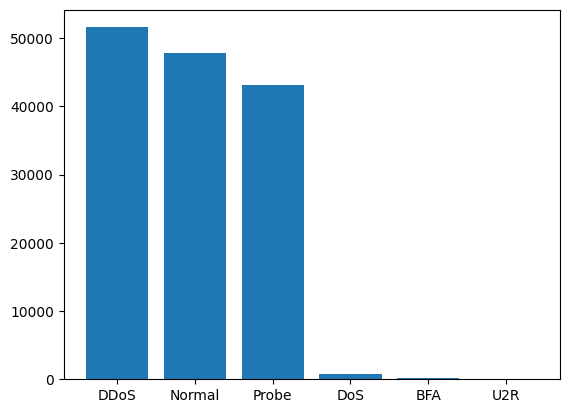

In [29]:
x,  y = train_labels.value_counts().index, train_labels.value_counts(). values

plt.bar(x, y)

plt.show()

In [30]:
##Feature correlation (pearson allows us to observe linear correlation)
correlation_matrix = train.corr(method = "pearson")

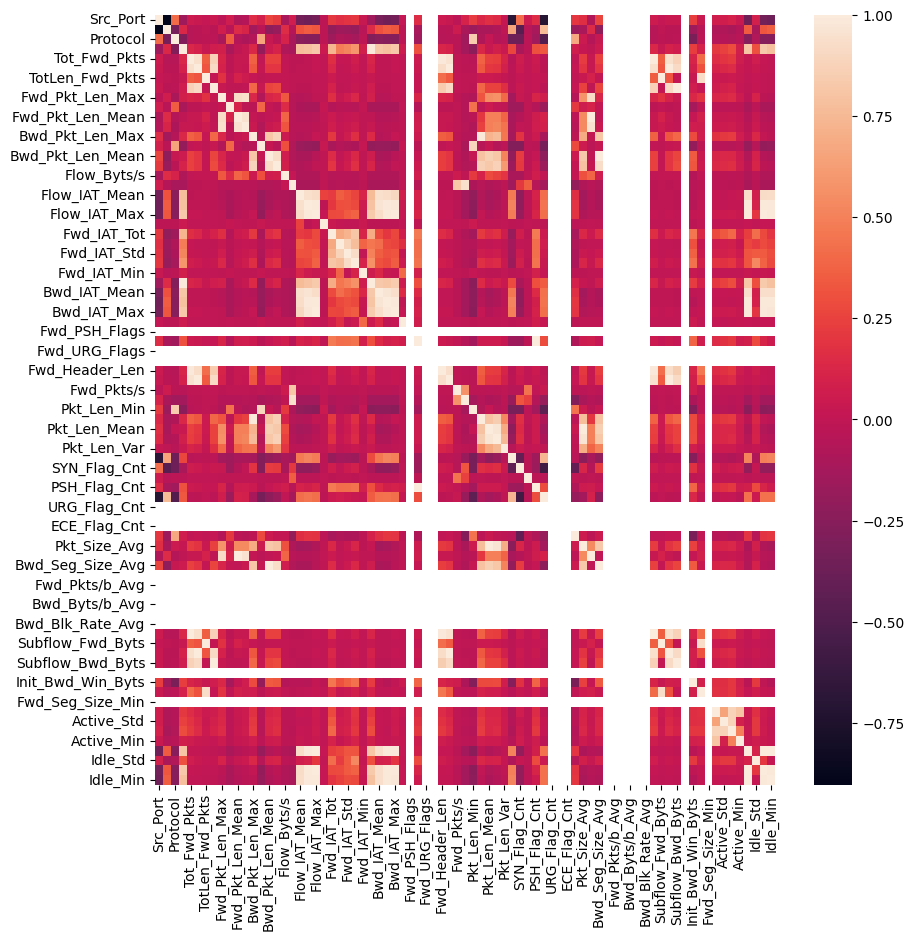

In [31]:
## correlation heatmap
plt.figure(figsize = (10,10))
sns.heatmap(correlation_matrix)
plt.show()

In [32]:
correlation_matrix

,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
Src_Port,1.000000,-0.903043,0.408463,-0.145166,0.050648,0.037758,0.012336,0.033849,-0.019634,0.068701,...,0.040198,NaN,0.071633,0.078141,0.093275,0.036443,-0.352647,0.092808,-0.338097,-0.363945
Dst_Port,-0.903043,1.000000,-0.329418,0.134572,-0.045298,-0.032592,-0.008437,-0.028542,0.074871,-0.035731,...,-0.033554,NaN,-0.083619,-0.072533,-0.094501,-0.055584,0.344679,-0.097464,0.329630,0.356215
Protocol,0.408463,-0.329418,1.000000,-0.280577,-0.041504,-0.027529,-0.011296,-0.019679,-0.097959,0.348420,...,-0.022101,NaN,-0.057003,-0.050935,-0.066101,-0.036679,-0.254699,-0.064129,-0.257548,-0.249559
Flow_Duration,-0.145166,0.134572,-0.280577,1.000000,0.123216,0.094294,0.030307,0.068715,0.085370,-0.106421,...,0.099596,NaN,0.204677,0.246933,0.288224,0.082243,0.806488,0.302594,0.826469,0.779474
Tot_Fwd_Pkts,0.050648,-0.045298,-0.041504,0.123216,1.000000,0.947951,0.358868,0.870280,0.110151,-0.015727,...,0.407826,NaN,0.154701,0.187264,0.212998,0.060601,0.008015,0.064981,0.015746,0.001311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Active_Min,0.036443,-0.055584,-0.036679,0.082243,0.060601,0.035655,0.027866,0.013415,0.053457,-0.013555,...,0.093326,NaN,0.805611,0.087307,0.488649,1.000000,0.028753,0.062372,0.034309,0.023404
Idle_Mean,-0.352647,0.344679,-0.254699,0.806488,0.008015,0.005343,-0.003421,-0.003929,-0.023331,-0.104198,...,0.013074,NaN,0.035745,0.024338,0.029184,0.028753,1.000000,0.107636,0.994924,0.995917
Idle_Std,0.092808,-0.097464,-0.064129,0.302594,0.064981,0.040385,0.012496,0.022177,0.102494,-0.023429,...,0.077410,NaN,0.170803,0.208193,0.207031,0.062372,0.107636,1.000000,0.202446,0.019905
Idle_Max,-0.338097,0.329630,-0.257548,0.826469,0.015746,0.010173,-0.001766,-0.001340,-0.011173,-0.105019,...,0.022541,NaN,0.054250,0.048263,0.053699,0.034309,0.994924,0.202446,1.000000,0.982397


# Data Inplications

    #Implied by findings above, we say the following:

    - Missing values and outliers: There are no missing valaues in the trainset. As regards outliers, there are quite a few. 
    - Data imbalance: the datasetis strongly imbalanced with respect to the instance labels. This impliued that regular classification metrics like accuracy would not be good enough for evaluating final model
    - Scaling: Depending on the final algorithm used, there might be a need for feature scaling with a good number of variables in the data. This would discourage from assigning undue degrees of importance (i.e: weights) to a variable simplydue to average magnitude. 
    - Correlation: There is a low multicinearity within the dataset. Some features exhibit strong correlation with one another. Some of the features may need to be eliminated or combined somehow to maintain feature independence.
    - Data Dimensionality. There are around - 84 differenct features in the dataset. Although the number of observations (0.14 million) will offset the curse of dimensionality, the need to reduce the dimensionality may still arise. 
    - Large Number of Records: The lsrge number of records (- o.14 million) is a characteristics of the amount of data generated from day to day operations of the compyter networs. As such, optimized algorithm would be required for effective computation. 
    - Irrelevant columns: Some columns are irrelevant since they have a variance of zero. These columns need to be eliminated

## Based on the data Implication discovered prior, The following steps will be experimented upon the data preparation stage.

    1, Remove invariant and irrelevent columns The invariant are irrelevant columns will be elimimnated
    2, Feature Scaling: The dataset will be scaled using the StandardScaler implementation provided by sci-ki tlearn.  In order to satisfy the need optimal computation, 
    3. Feature Selection: The non numerical features of the dataset are filtered out and the numerical ones are retained. This is done in order to avoid complicated feature engineering. 
    4. Distributed Computing: In order to satisfy the need for optimal computation, most of (if not all) the algorithms used will be obtained from Pyspark. 

All these steps are implemented as below:


In [ ]:
## Import required utilities
from pyspark.ml.feature import VectorAssembler, StringIndexer, IndexToString 

In [34]:
# Drop the invariant features
train.drop(labels = invariant_features, axis = 1, inplace = True)
test.drop(labels = invariant_features, axis = 1, inplace = True)

In [35]:
## Drop the irrelevant features
irrelevant_features = ["Src_Port", "Dst_Port"]

train.drop(labels = irrelevant_features, axis = 1, inplace = True)
test.drop(labels = irrelevant_features, axis = 1, inplace = True)

In [36]:
train.head()

,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,...,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
0,6,268599,2,3,0,23,0,0,0.0,0.00000,...,64,0,0.0,0.0,0,0,0.0,0.0,0,0
1,6,22194,5,5,53,30,30,0,10.6,14.72413,...,215,2,0.0,0.0,0,0,0.0,0.0,0,0
2,6,8782,4,4,30,30,30,0,7.5,15.00000,...,215,1,0.0,0.0,0,0,0.0,0.0,0,0
3,6,4047,2,2,0,0,0,0,0.0,0.00000,...,5792,0,0.0,0.0,0,0,0.0,0.0,0,0
4,6,3819,2,2,0,0,0,0,0.0,0.00000,...,5792,0,0.0,0.0,0,0,0.0,0.0,0,0


In [37]:
## Elimanate dupliacted labels
train_labels = train_labels.loc[train.index]
test_labels = test_labels.loc[test.index] 

In [38]:
## combine targets and features from pyspark
train["Label"] = train_labels
test["Label"] = test_labels

In [39]:
## Eliminate outliers
outlier_detector = LocalOutlierFactor(novelty = True)

outlier_detector.fit(train.drop(labels = "Label", axis = 1))

#outlier_detector.fit(test.drop(labels = "Label", axis = 1))

LocalOutlierFactor(novelty=True)

In [40]:
## Predict outliers in dataset

train_outliers = outlier_detector.predict(train.drop(labels = "Label", axis = 1).values)
test_outliers = outlier_detector.predict(test.drop(labels = "Label", axis = 1).values)

/Users/xlade/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/Users/xlade/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


In [41]:
print("Numbers of outliers in Train dataset:", sum(train_outliers == -1))
print("Numbers of outliers in Test dataset:", sum(test_outliers == -1))

Numbers of outliers in Train dataset: 4957
Numbers of outliers in Test dataset: 2457


In [42]:
## Data shape

train.shape, test.shape

((93217, 64), (40402, 64))

In [43]:
## eliminate outliers

train = train.loc[train_outliers == -1]
test = test.loc[test_outliers == -1]

In [44]:
## Data shape

train.shape, test.shape

((4957, 64), (2457, 64))

In [45]:
## scale our data from sklearn.preprocessing impot StandardScaler

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer


In [46]:
df = train.drop(labels = "Label", axis = 1)

difference = df.max() - df.min()

difference

Protocol                  17.0
Flow_Duration      120000065.0
Tot_Fwd_Pkts           16928.0
Tot_Bwd_Pkts           34093.0
TotLen_Fwd_Pkts     15000000.0
                      ...     
Active_Min         104000000.0
Idle_Mean          120000000.0
Idle_Std            73000000.0
Idle_Max           120000000.0
Idle_Min           120000000.0
Length: 63, dtype: float64

In [47]:
print(" numbers of categorical variables in df:", sum(df.dtypes == True))

 numbers of categorical variables in df: 0


In [48]:
train.columns

Index(['Protocol', 'Flow_Duration', 'Tot_Fwd_Pkts', 'Tot_Bwd_Pkts',
       'TotLen_Fwd_Pkts', 'TotLen_Bwd_Pkts', 'Fwd_Pkt_Len_Max',
       'Fwd_Pkt_Len_Min', 'Fwd_Pkt_Len_Mean', 'Fwd_Pkt_Len_Std',
       'Bwd_Pkt_Len_Max', 'Bwd_Pkt_Len_Min', 'Bwd_Pkt_Len_Mean',
       'Bwd_Pkt_Len_Std', 'Flow_Byts/s', 'Flow_Pkts/s', 'Flow_IAT_Mean',
       'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min', 'Fwd_IAT_Tot',
       'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max', 'Fwd_IAT_Min',
       'Bwd_IAT_Tot', 'Bwd_IAT_Mean', 'Bwd_IAT_Std', 'Bwd_IAT_Max',
       'Bwd_IAT_Min', 'Bwd_PSH_Flags', 'Fwd_Header_Len', 'Bwd_Header_Len',
       'Fwd_Pkts/s', 'Bwd_Pkts/s', 'Pkt_Len_Min', 'Pkt_Len_Max',
       'Pkt_Len_Mean', 'Pkt_Len_Std', 'Pkt_Len_Var', 'FIN_Flag_Cnt',
       'SYN_Flag_Cnt', 'RST_Flag_Cnt', 'PSH_Flag_Cnt', 'ACK_Flag_Cnt',
       'Down/Up_Ratio', 'Pkt_Size_Avg', 'Fwd_Seg_Size_Avg', 'Bwd_Seg_Size_Avg',
       'Subflow_Fwd_Pkts', 'Subflow_Fwd_Byts', 'Subflow_Bwd_Pkts',
       'Subflow_Bwd_Byts', 'Init

In [49]:
#test.columns

In [50]:
## pick out the categorical features

categorical_columns = ["Protocol"]

categorical_columns += [c for c in train.columns if "Flag" in c]
categorical_columns

['Protocol',
 'Bwd_PSH_Flags',
 'FIN_Flag_Cnt',
 'SYN_Flag_Cnt',
 'RST_Flag_Cnt',
 'PSH_Flag_Cnt',
 'ACK_Flag_Cnt']

In [51]:
## Threshold
threshold = 100

scale_columns = difference.loc[difference >= threshold].index.tolist()
scale_columns

['Flow_Duration',
 'Tot_Fwd_Pkts',
 'Tot_Bwd_Pkts',
 'TotLen_Fwd_Pkts',
 'TotLen_Bwd_Pkts',
 'Fwd_Pkt_Len_Max',
 'Fwd_Pkt_Len_Min',
 'Fwd_Pkt_Len_Mean',
 'Fwd_Pkt_Len_Std',
 'Bwd_Pkt_Len_Max',
 'Bwd_Pkt_Len_Min',
 'Bwd_Pkt_Len_Mean',
 'Bwd_Pkt_Len_Std',
 'Flow_Byts/s',
 'Flow_Pkts/s',
 'Flow_IAT_Mean',
 'Flow_IAT_Std',
 'Flow_IAT_Max',
 'Flow_IAT_Min',
 'Fwd_IAT_Tot',
 'Fwd_IAT_Mean',
 'Fwd_IAT_Std',
 'Fwd_IAT_Max',
 'Fwd_IAT_Min',
 'Bwd_IAT_Tot',
 'Bwd_IAT_Mean',
 'Bwd_IAT_Std',
 'Bwd_IAT_Max',
 'Bwd_IAT_Min',
 'Fwd_Header_Len',
 'Bwd_Header_Len',
 'Fwd_Pkts/s',
 'Bwd_Pkts/s',
 'Pkt_Len_Min',
 'Pkt_Len_Max',
 'Pkt_Len_Mean',
 'Pkt_Len_Std',
 'Pkt_Len_Var',
 'Pkt_Size_Avg',
 'Fwd_Seg_Size_Avg',
 'Bwd_Seg_Size_Avg',
 'Subflow_Fwd_Pkts',
 'Subflow_Fwd_Byts',
 'Subflow_Bwd_Pkts',
 'Subflow_Bwd_Byts',
 'Init_Bwd_Win_Byts',
 'Fwd_Act_Data_Pkts',
 'Active_Mean',
 'Active_Std',
 'Active_Max',
 'Active_Min',
 'Idle_Mean',
 'Idle_Std',
 'Idle_Max',
 'Idle_Min']

In [52]:
columns = difference.index.tolist()

int_scale_columns = [columns.index(c) for c in scale_columns if c not in categorical_columns]
int_scale_columns

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62]

In [53]:
remainder_columns = [c for c in range(len(columns)) if c not in int_scale_columns]
remainder_columns

[0, 30, 40, 41, 42, 43, 44, 45]

In [54]:
## implement custom scaling operation

def scale_data(train, test, columns_to_scale):
    x_train, y_train = train.drop(labels = "Label", axis = 1), train["Label"]
    x_test, y_test = test.drop(labels = "Label", axis = 1), test["Label"]
    transformer = ColumnTransformer(
        transformers = [
            ("scaler", StandardScaler(), columns_to_scale)
        ],
        remainder = "passthrough"
    )
    ## Train te transformer
    transformer.fit(x_train)
    ## Applt transformer on train and test dataset
    x_train = transformer.transform(x_train)
    x_test = transformer.transform(x_test)
    ## Get the feature aname out 
    columns = transformer.get_feature_names_out()
    columns = [c.split("__")[-1] for c in columns]

    train, test = pd.DataFrame(data  = x_train, columns = columns), pd.DataFrame(data = x_test, columns = columns)
    
    train["Label"] = y_train
    test["Label"] = y_test

    return transformer, train, test ## pd.DataFrame(data = x_train, columns = columns), pd.DataFrame(data = x_test, columns = columns)

In [55]:
scaler, train, test = scale_data(train, test, int_scale_columns)

In [56]:
train.head(n=5)

,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,...,Idle_Min,Protocol,Bwd_PSH_Flags,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,Down/Up_Ratio,Label
0,-0.760783,-0.088635,-0.082789,-0.049230,-0.066699,-0.163651,-0.175432,-0.125471,-0.109850,-0.250528,...,-0.653222,6.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN
1,-0.760731,-0.088635,-0.082789,-0.049230,-0.066699,-0.163651,-0.175432,-0.125471,-0.109850,-0.250528,...,-0.653222,6.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN
2,-0.760885,-0.094511,-0.085435,-0.049315,-0.066711,-0.175276,-0.175432,-0.132751,-0.120172,-0.253601,...,-0.653222,6.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN
3,-0.760765,-0.088635,-0.082789,-0.049230,-0.066699,-0.163651,-0.175432,-0.125471,-0.109850,-0.250528,...,-0.653222,6.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN
4,-0.760902,-0.088635,-0.082789,-0.049230,-0.066699,-0.163651,-0.175432,-0.125471,-0.109850,-0.250528,...,-0.653222,6.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN


In [57]:
train.loc[:5, "Protocol"]

0    6.0
1    6.0
2    6.0
3    6.0
4    6.0
5    6.0
Name: Protocol, dtype: float64

In [58]:
### Labels
train['Label'].unique()

array([nan, 'BFA', 'DDoS'], dtype=object)

In [59]:
## instantiate spark session
from pyspark.sql.session import SparkSession
spark = SparkSession.builder.master("local[*]").config("spark.some.config.option", "some-value").appName("Network Intrusion").getOrCreate()

24/10/22 13:47:22 WARN Utils: Your hostname, MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 192.168.1.198 instead (on interface en0)
24/10/22 13:47:22 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/10/22 13:47:23 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


----------------------------------------
Exception occurred during processing of request from ('127.0.0.1', 60069)
Traceback (most recent call last):
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/socketserver.py", line 316, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/socketserver.py", line 347, in process_request
    self.finish_request(request, client_address)
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/socketserver.py", line 360, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/socketserver.py", line 747, in __init__
    self.handle()
  File "/Users/xlade/Library/Python/3.9/lib/python/si

In [60]:
#pandas DF to spark DF
train = spark.createDataFrame(train)
test = spark.createDataFrame(test)

In [61]:
## Assemble features in vectors

assembler = VectorAssembler(inputCols = [c for c in train.columns if c != "Label"], outputCol = "feature")

##Encode labels 
string_encoder = StringIndexer(inputCol = "Label", outputCol = "Int_Label")

In [62]:
## Fit string encoder
string_encoder = string_encoder.fit(test)

train = string_encoder.transform(train)
test = string_encoder.transform(test)

24/10/22 13:47:29 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [63]:
## peek at data
train.show(2)

+-------------------+--------------------+--------------------+------------------+--------------------+--------------------+--------------------+-------------------+--------------------+-------------------+-------------------+-------------------+------------------+--------------------+--------------------+-------------------+-------------------+-------------------+--------------------+--------------------+-------------------+--------------------+--------------------+--------------------+-------------------+-------------------+-------------------+-------------------+--------------------+--------------------+-------------------+--------------------+-------------------+------------------+--------------------+-------------------+-------------------+--------------------+-------------------+-------------------+-------------------+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+--------------------+------------------

In [64]:
## use vector assembler 
train = assembler.transform(train)
test = assembler.transform(test)

In [65]:
test.show() 

+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+--------------------+-------------------+--------------------+--------------------+--------------------+--------------------+-------------------+-------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------+-------------------+-------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+--------------------+-----

## Data modelling
    1, Logistic regression
    2, Decision Tree 
    3, OVR + Logistic regression

In [66]:
from pyspark.ml.classification import LogisticRegression, OneVsRest
from pyspark.ml.classification import DecisionTreeClassifier

In [67]:
## Instantiate our models

dtc_model = DecisionTreeClassifier(featuresCol = "feature", labelCol = "Int_Label", predictionCol = "prediction", maxDepth = 10, impurity = "entropy")
log_model = LogisticRegression(featuresCol = "feature", labelCol = "Int_Label", predictionCol = "prediction", maxIter = 500, aggregationDepth = 2)
ovr_model = OneVsRest(
    featuresCol = "feature", labelCol = "Int_Label",
    classifier = LogisticRegression(featuresCol = "feature", labelCol = "Int_Label", predictionCol = "prediction", maxIter = 500, aggregationDepth = 2)
)

### FIt models



In [68]:
dtc_model = dtc_model.fit(train)
log_model = log_model.fit(train)
ovr_model = ovr_model.fit(train)

24/10/22 13:47:53 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS


## MOdel Evaluation 

In [69]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [70]:
def generate_model_score(model, data, metric):
    evaluator = MulticlassClassificationEvaluator(labelCol = "Int_Label", predictionCol = "prediction", metricName = metric)
    predictions = model.transform(data)
    score = evaluator.evaluate(predictions)
    return score


In [71]:
def print_metrics(metric, train_score, test_score):
    print(f" Train {metric.capitalize()} = {100 * test_score: .3f}%")
    print(f" Test {metric.capitalize()} = {100 * test_score: .3f}%")
    print(f" Generalization error {100 * (test_score): .3f}%")
    
    return


In [72]:
def test_model(model, data, metric):
    train, test = data

    if isinstance(metric, str):
        train_score = generate_model_score(model, train, metric)
        test_score = generate_model_score(model, train, metric)

        print_metrics(metric.lower(), train_score, test_score)
    else:
        for m in metric:
            train_score = generate_model_score(model, train, m)
            test_score = generate_model_score(model, test, m)

            print_metrics(m.lower(), train_score, test_score)
            print("="*20 + "\n")

    return

In [73]:
## Metrics

metrics = ["accuracy", "weightedRecall", "weightedPrecision", "f1"]

In [74]:
## Decision tree
test_model(dtc_model, [train, test], metrics)


 Train Accuracy =  97.436%
 Test Accuracy =  97.436%
 Generalization error  97.436%

 Train Weightedrecall =  97.436%
 Test Weightedrecall =  97.436%
 Generalization error  97.436%

 Train Weightedprecision =  95.765%
 Test Weightedprecision =  95.765%
 Generalization error  95.765%

 Train F1 =  96.483%
 Test F1 =  96.483%
 Generalization error  96.483%



In [75]:
## logistic regression
test_model(log_model, [train, test], metrics)


 Train Accuracy =  97.517%
 Test Accuracy =  97.517%
 Generalization error  97.517%

 Train Weightedrecall =  97.517%
 Test Weightedrecall =  97.517%
 Generalization error  97.517%



 Train Weightedprecision =  96.593%
 Test Weightedprecision =  96.593%
 Generalization error  96.593%

 Train F1 =  96.631%
 Test F1 =  96.631%
 Generalization error  96.631%



In [ ]:
## ovr + logistics regression
test_model(ovr_model, [train, test], metrics)

In [77]:
## Get model weight 
## Extract weights by label
## Combine. the weight plus features
## visualize

In [77]:
# get weights
weights = log_model.coefficientMatrix.toArray()

In [78]:
weights.shape

(3, 63)

In [79]:
def weights_per_label(weights, columns, label = 0):
    label_weights = weights[label].tolist() #Extract label weights
    data = dict(zip(columns, label_weights))
    return pd.Series(data = data)


In [87]:
weights_per_label(weights, columns, label = 0)

Protocol          -10.615265
Flow_Duration       2.931037
Tot_Fwd_Pkts        3.830585
Tot_Bwd_Pkts       17.734891
TotLen_Fwd_Pkts     5.270902
                     ...    
Active_Min        -23.552575
Idle_Mean          -0.775006
Idle_Std           15.073389
Idle_Max          -21.340749
Idle_Min           -1.511181
Length: 63, dtype: float64

In [80]:
def visualize_weights_per_label(weight, columns, label = 1, large = True, num_weights = 10):
    label_weights = weights_per_label(weights, columns, label)
    
    label = pd.DataFrame(data = [label], columns = ["Int_Label"])
    label = spark.createDataFrame(label)
    label_mapper = IndexToString(inputCol = "Int_Label", outputCol = "Label", labels = string_encoder.labels)

    label = label_mapper.transform(label).toPandas()
    label = label["Label"].values.item()

    label_weights = label_weights.sort_values(ascending = False)

    if large:
        final_weights = label_weights.head(n = num_weights)
        title = f"Top {num_weights} largest (or positive) weights for the `{label}` label"
    else:
        final_weights = label_weights.tail(n = num_weights)
        title = f"Bottom {num_weights} smallest (or negative) weights for the `{label}` label"
    
    x, y = final_weights.index, final_weights.values

    plt.bar(x=x, height=y)
    plt.title(title, fontsize = 25, pad = 5)

    plt.xlabel("Features")
    plt.ylabel("Feature weights")

    plt.xticks(rotation = 45)

    plt.show(); plt.close()

    return

    

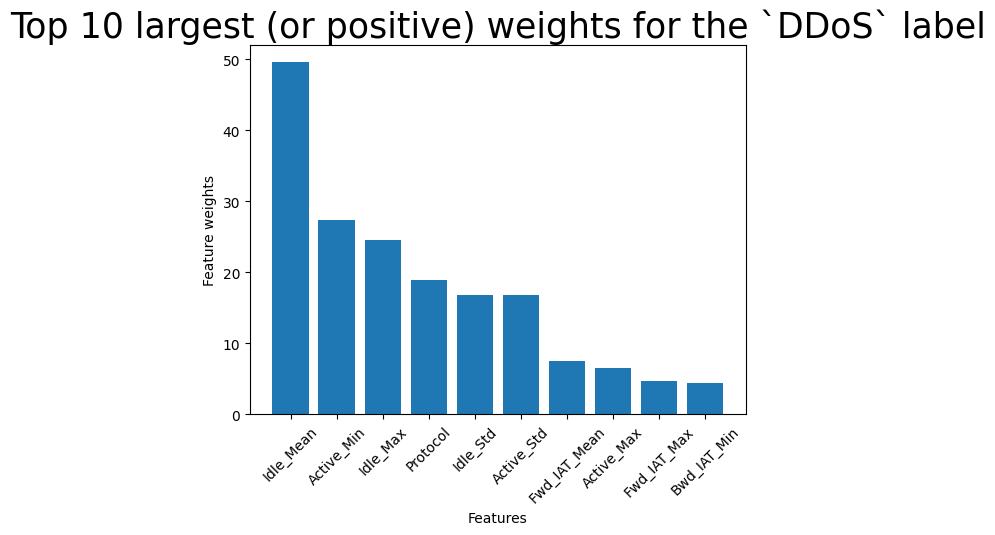

In [81]:
visualize_weights_per_label(weights, columns, label = 1, large = True, num_weights = 10)

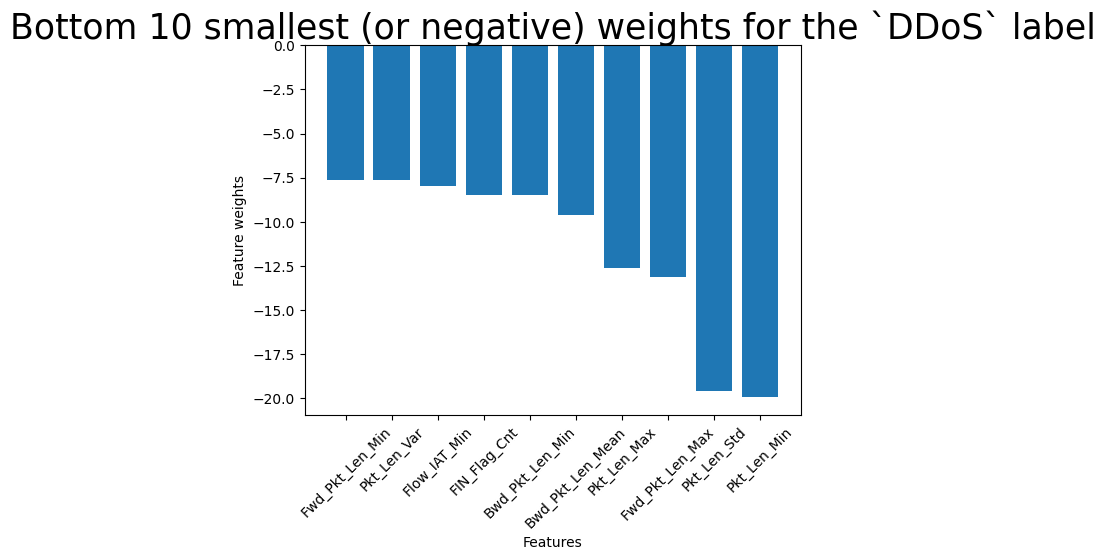

In [89]:
visualize_weights_per_label(weights, columns, label = 1, large = False, num_weights = 10)

## Model Deployment

## Generate data
## convert dataset to spark dataFrame
## Transform the dataframe as required (standard scaler, vector assembler, string indexer)
## prediction pipeline
## display the prediction as we wish

In [82]:
## create information bank to store feature description
information_bank = dict()

data = train.sample(withReplacement = False, seed = 2023, fraction = 0.5).toPandas() ## sample dataset

for column in columns:
    series = data[column]

    #if  the feature is categorical, store the set of values the dataset can samnple from 
    if (len(series.unique()) <= 30) or (series.dtype == "object"):
        information_bank[column] = series.unique().tolist()
    else:
        if series.dtype == float:
            dtype = "float"
        else:
            dtype = "int" 
            
        information_bank[column] = {
            "min": series.min(), #.item(),
            "max": series.max(), #.item(),
            "dtype": dtype
        }
    

In [ ]:
information_bank

In [83]:
def generate_data(columns, information_bank, sample_size = 1):
    data = pd.DataFrame(columns = columns)

    for column in columns:
        column_info = information_bank[column] # pick out column information
    
        #categorical features
        if isinstance(column_info, list):
            results = [np.random.choice(column_info) for _ in range(sample_size)]
        else:
            low, high = column_info["min"], column_info["max"]

            if column_info["dtype"] == "float":
                results = np.random.randint(low = low, high = high + 1, size = sample_size) + np.random.randn(sample_size)
            else:
                results = nprandom.randint(low = low, high = high + 1, size = sample_size)
        data[column] = results # populate te dataframe with the generated data
    
    return data








        

In [84]:
generate_data(columns, information_bank, 5)

,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,...,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
0,17.0,-1.035992,29.406305,23.526014,18.671144,3.898141,18.324218,1.353885,-1.446686,-0.822180,...,-0.901646,-0.021761,9.922094,14.916235,17.274459,11.778009,-0.839642,3.259826,2.322249,3.790557
1,6.0,1.948482,9.709766,10.080729,2.233644,36.209610,9.488018,2.797053,12.970149,14.457043,...,0.822590,2.385198,3.279325,17.921215,2.235505,1.235110,3.480208,9.483058,0.498437,4.247020
2,17.0,0.216510,27.002194,21.738151,11.801920,44.827850,21.655786,2.363814,28.570874,30.760845,...,-0.783079,6.599226,2.133992,24.616504,3.425402,6.799811,1.248199,5.436232,2.027032,3.009898
3,6.0,0.135153,25.721492,26.042292,21.307213,36.243483,22.976623,30.646827,18.474843,4.853725,...,0.030038,4.528139,9.230015,7.852789,15.543011,14.880402,2.804234,1.622477,1.020999,0.230208
4,17.0,0.876096,21.315289,33.294181,0.482261,33.090966,9.291470,35.312650,11.092000,11.721901,...,-1.077232,4.581439,3.654285,0.193529,7.484090,9.671268,-0.594805,7.182273,1.515630,4.255124


In [85]:
def prepare_data(columns, information_bank, sample_size = 1):
    data = generate_data(columns, information_bank, sample_size)
    data = spark.createDataFrame(data)
    data = assembler.transform(data)

    return data

In [86]:
data = prepare_data(columns, information_bank, 5)

In [88]:
def prediction_pipeline(data, model):
    predictions = model.transform(data) #generate predictions
    label_mapper = IndexToString(inputCol = "prediction", outputCol = "Label", labels = string_encoder.labels)

    predictions = label_mapper.transform(predictions).toPandas()
    predictions = predictions["Label"].values.tolist()

    return predictions

In [90]:
predictions = prediction_pipeline(data, log_model)

In [91]:
predictions

['NaN', 'NaN', 'NaN', 'NaN', 'NaN']

In [93]:
def postprocess_predictions(predictions):
    predictions = [
        (f"Operational Status: {status}" if status == "Normal" 
        else f"Operational Status: Under Threat! Threat type: {status}. Take appropriate action now!")
        for status in predictions
    ]

    predictions = [
        "<h4>" + prediction + "<h4>" for prediction in predictions
    ]
    return "".join(predictions)

In [94]:
postprocess_predictions(predictions)

'<h4>Operational Status: Under Threat! Threat type: NaN. Take appropriate action now!<h4><h4>Operational Status: Under Threat! Threat type: NaN. Take appropriate action now!<h4><h4>Operational Status: Under Threat! Threat type: NaN. Take appropriate action now!<h4><h4>Operational Status: Under Threat! Threat type: NaN. Take appropriate action now!<h4><h4>Operational Status: Under Threat! Threat type: NaN. Take appropriate action now!<h4>'

In [97]:
from flask import Flask


In [100]:
app = Flask(__name__)

@app.route("/")
def inference():
    
    n = request.args.get("n", default=1, type=int)
    
    data = prepare_data(columns, information_bank, n)
    predictions = prediction_pipeline(data, log_model)
    predictions = postprocess_predictions(predictions)

    return predictions

In [102]:
if __name__ == "__main__":
    app.run(debug = True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat
Traceback (most recent call last):
  File "/Users/xlade/Library/Python/3.9/lib/python/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Users/xlade/Library/Python/3.9/lib/python/site-packages/traitlets/config/application.py", line 1074, in launch_instance
    app.initialize(argv)
  File "/Users/xlade/Library/Python/3.9/lib/python/site-packages/traitlets/config/application.py", line 118, in inner
    return method(app, *args, **kwargs)
  File "/Users/xlade/Library/Python/3.9/lib/python/site-packages/ipykernel/kernelapp.py", line 692, in initialize
    self.init_sockets()
  File "/Users/xlade/Library/Python/3.9/lib/python/site-packages/ipykernel/kernelapp.py", line 331, in init_sockets
    self.shell_port = self._bind_socket(self.shell_socket, self.shell_port)
  File "/Users/xlade/Library/Python/3.9/lib/python/site-packages/ipykernel/kernelapp.py", line 253, in

SystemExit: 1

/Users/xlade/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py:3558: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


24/10/23 00:01:07 WARN HeartbeatReceiver: Removing executor driver with no recent heartbeats: 996781 ms exceeds timeout 120000 ms
24/10/23 00:01:07 WARN SparkContext: Killing executors is not supported by current scheduler.
24/10/23 00:15:05 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:642)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1223)
	at o